### MNIST Classification - Image dataset
#### Classifying a single image (Yes 5 or Not 5)

<b> Notebook author: </b> Nirupam Purushothama

<b> Source: </b> Hands-On Machine Learning with Scikit-Learn & TensorFlow

##### About the dataset 
mldata.org is permanently down and hence the dataset is currently available only from other Githubs. So, for now I downloaded it manually and made it available in the cache location. 

#### 1. Load the dataset

In [28]:
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [7]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

#### 2. Visualize the dataset
MNIST data is image data - Let's explore the data once. 
The dataset is 70,000 images and each image has 784 features.

<b>Why 784 features?</b>

Because the images are 28 X 28 pixels and each feature simply represents one pixel's intensity on a scale of 0(white) to 255(black)

<b>Let's display one of the images</b>

In [6]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


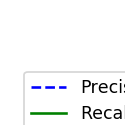

In [15]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
fig, ax = plt.subplots(figsize=(1, 1))
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

#### 3. Split to training and test sets

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### 4. Train a Binary Classifier (5 or Not-5)
Now the book uses Stochastic Gradient Descent function from Sklearn. But gradient descent is an optimization function and it is confusing on what this SGDClassifier is. But that is nothing but a linear classifier optimized by SGD. Have a look at this [thread](https://datascience.stackexchange.com/questions/37941/what-is-the-difference-between-sgd-classifier-and-the-logisitc-regression) on stackexchange. 

As per the book, the advantages with SGDClassifier apparently are that it can efficiently handle very large datasets and also it deals with training instances independently which makes it well suited for "online learning".

In [18]:
# Creates a full length response vector with True for all 5s and False for all other digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### Lets test it on some_digit

In [22]:
sgd_clf.predict([some_digit])

# It works - Cool!

array([ True])

#### Cross validate and check the accuracy

In [24]:
# Change the scoring function from reporting default score method (which probably is R^2) to accuracy
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.9598 , 0.96935, 0.94055])

##### 95% accuracy. But the dataset itself has only 10% of 5s and hence even if we classify everything as not-5 we will achieve 90% accuracy. Hence. we check for something better.

The book suggests the use of confusion matrices to report the performance of the classifier. So, lets do that.

Compute confusion matrix to evaluate the accuracy of a classification

By definition a confusion matrix C is such that C[i,j] is equal to the number of observations known to be in group i but predicted to be in group j.

Thus in binary classification, the count of true negatives is C[0,0], false negatives is c[1,0], true positives is c[1,1] and false positives is c[0,1].

E.g.
>>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
>>> (tn, fp, fn, tp)
(0, 2, 1, 1)

In [32]:
# Cross_val_predict does cross validation but instead of returning the evaluation scores it returns 
# the predictions made on each test fold. Test set is reserved only for reporting accuracy.

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

In [38]:
# Precision = TP / (TP + FP); Recall (Sensitivity) = TP / (TP + FN)
# We can use above metrics to compute the same or we can compute that using sklearn methods

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

# Fscore = 2 / (1/precision + 1/recall) # This is a harmonic mean and hence gives higher weight to low values
# and hence this score is high if both recall and precision are high

# Precision/recall tradeoff - If you increase one, then generally the other decreases
# We can influence the SGDClassifier by obtaining the decision values and then deciding the threshold by ourselves.
# This is similar to logistic_regression where you can decide the threshold to call 1 or 0.

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

0.755769580228966
0.7672016233167313
0.7614426949835226


#### Precision Recall Curves
Given all this, how do we identify the best precision and recall to decide on?
Plot them on a precision-recall curve and you will be able to identify the right thresholds.

1. Precision vs. Recall vs. Thresholds

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

<IPython.core.display.Javascript object>


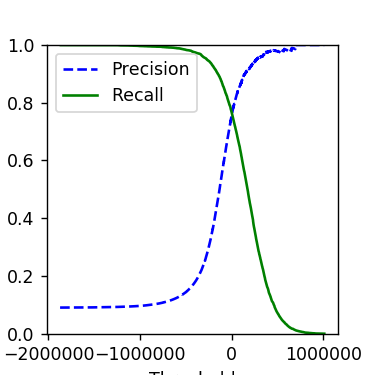

In [50]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
# Now a single function call would look as follows:
# y_scores = sgd_clf.decision_function([some_digit]) # --> This gives the decision score for one input
# We proceed to use cross validation here to get the values for the entire set.

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot these values on the curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.subplots(figsize=(3, 3))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

2. Precision vs. Recall

<IPython.core.display.Javascript object>


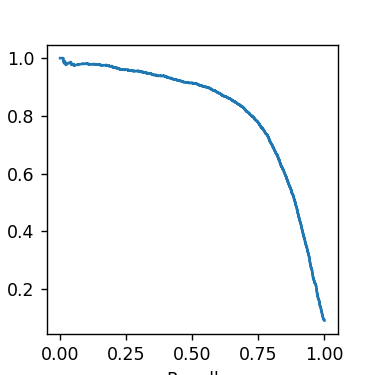

Text(0, 0.5, 'Precision')

In [52]:
%matplotlib notebook
plt.subplots(figsize=(3, 3))
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")

# You can also check the ROC curve - Receiver operating characteristic. Check it online. It is TP vs. FP rates.

I will stop this notebook here. I do not want to rewrite the book here. The book has a pretty neat and detailed description on how to use ROC Curves and PR curves to arrive at the best threshold to be used for the classification problem at hand. It is a very good description that I have come across. It also applies a RandomForestClassifer and extracts the scores/probabilities for the cross_validation using method="predict_proba" as RandomForest does not implement decision_function. It also uses the roc_curve function from sklearn and then shows that RandomForest does a very good job at classification compared to the SGDClassifier for this problem. 